In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn import metrics

In [2]:
data = pd.read_csv('arrhythmia.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [4]:
data.shape

(452, 280)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


In [6]:
data.describe().transpose().head()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.0,47.0,58.0,83.0
1,452.0,0.550885,0.497955,0.0,0.0,1.0,1.0,1.0
2,452.0,166.188053,37.170340,105.0,160.0,164.0,170.0,780.0
3,452.0,68.170354,16.590803,6.0,59.0,68.0,79.0,176.0
4,452.0,88.920354,15.364394,55.0,80.0,86.0,94.0,188.0


In [7]:
#Let's see how many missing data we have and replace them with NaN's:
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

408


Text(0,0.5,'Count of NaN')

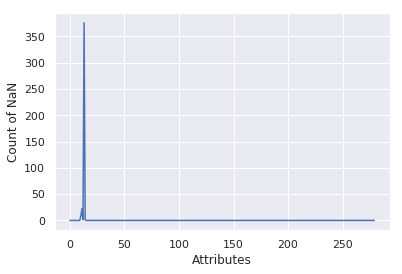

In [8]:
#Now let's see the distribution of our missing data: 
pd.isnull(data).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

Text(0,0.5,'Count of NaN')

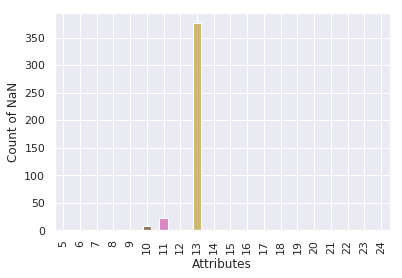

In [9]:
#zooming in :
pd.isnull(data).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN')

In [10]:
#dropping column 13
data.drop(columns = 13, inplace=True)

In [11]:
import fancyimpute
data_no_missing = fancyimpute.KNN(k=5).complete(data)

Using TensorFlow backend.


Imputing row 1/452 with 0 missing, elapsed time: 0.236
Imputing row 101/452 with 0 missing, elapsed time: 0.237
Imputing row 201/452 with 1 missing, elapsed time: 0.238
Imputing row 301/452 with 1 missing, elapsed time: 0.238
Imputing row 401/452 with 0 missing, elapsed time: 0.239


In [12]:
data_no_missing=pd.DataFrame(data_no_missing)
data_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [13]:
#Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [14]:
X = data_no_missing.drop(columns = 278)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [15]:
X.columns = X_columns
X.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [16]:
y = data[279]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

In [17]:
y.columns = ["Class"]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

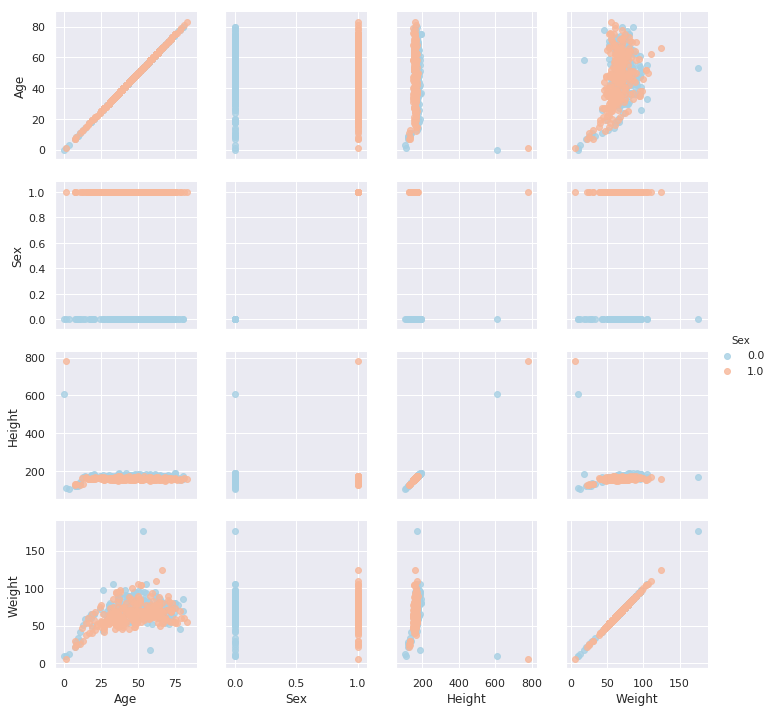

In [18]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.
I'll check the maximums of heights and weights

In [19]:
sorted(X['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was **272** cm (1940). His followers were **267** cm(1905) and **263.5** cm(1969) 

Replacing **780** and **608** with **108** and **180** cm

In [20]:
X['Height']=X['Height'].replace(608,108)
X['Height']=X['Height'].replace(780,180)

In [21]:
sorted(X['Weight'], reverse=True)[:10]


[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

Looks like **176** kgs is a possible weight. I'll keep them.

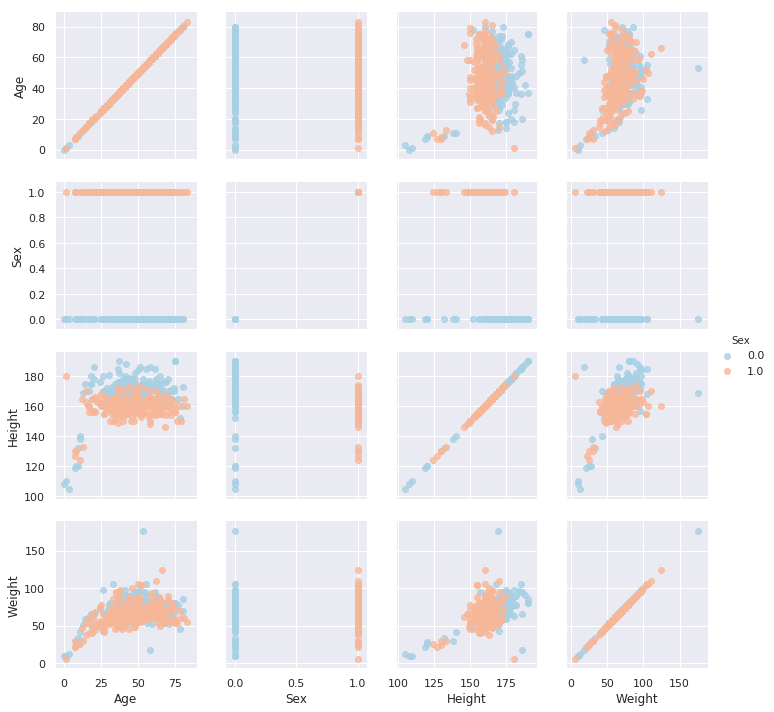

In [22]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

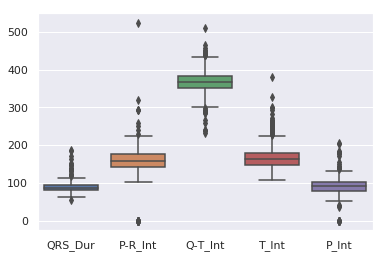

In [23]:
sns.boxplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

**PR interval** is the period, measured in milliseconds, that extends from the beginning of the P wave  until the beginning of the QRS complex; it is normally between **120 and 200ms** in duration. 

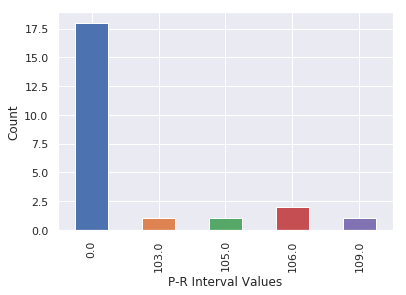

In [24]:
X['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

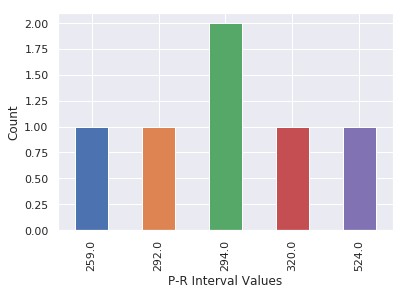

In [25]:
X['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

#### PR Interval data is including outliers 0(x18). I'll keep them

QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval data.

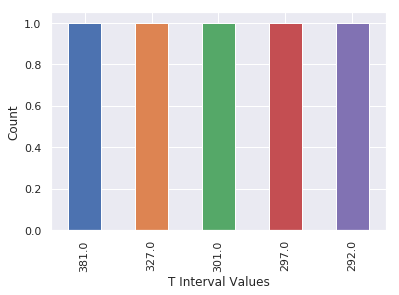

In [26]:
X['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

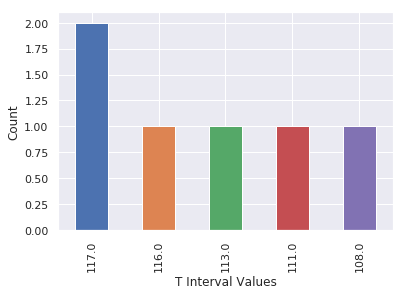

In [27]:
X['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

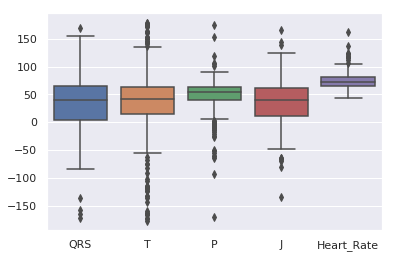

In [28]:
sns.boxplot(data=X[["QRS","T","P","J","Heart_Rate"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

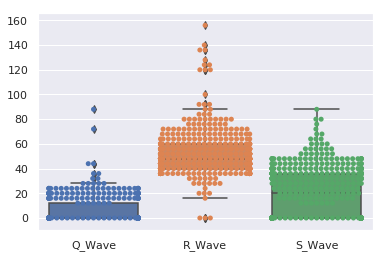

In [29]:
sns.boxplot(data=X[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=X[["Q_Wave","R_Wave","S_Wave"]]);

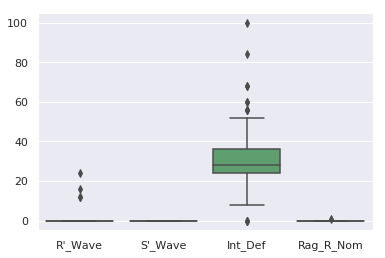

In [30]:
sns.boxplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);
#sns.swarmplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

#### S'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [31]:
X["R'_Wave"].value_counts().sort_index(ascending=False)

24.0      1
16.0      1
12.0      2
0.0     448
Name: R'_Wave, dtype: int64

In [32]:
X["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [33]:
X["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1.0      1
0.0    451
Name: Rag_R_Nom, dtype: int64

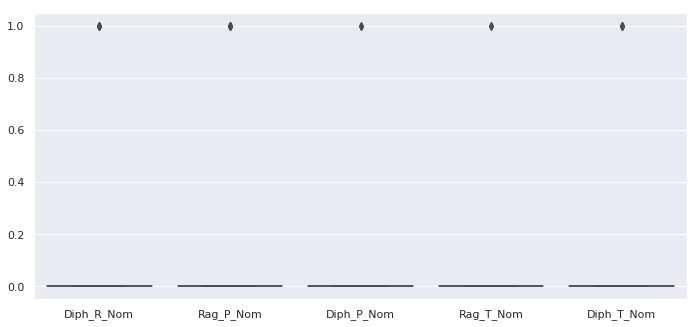

In [34]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [35]:
X["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Diph_R_Nom, dtype: int64

In [36]:
X["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Rag_P_Nom, dtype: int64

In [37]:
X["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Diph_P_Nom, dtype: int64

In [38]:
X["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Rag_T_Nom, dtype: int64

In [39]:
X["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1.0      4
0.0    448
Name: Diph_T_Nom, dtype: int64

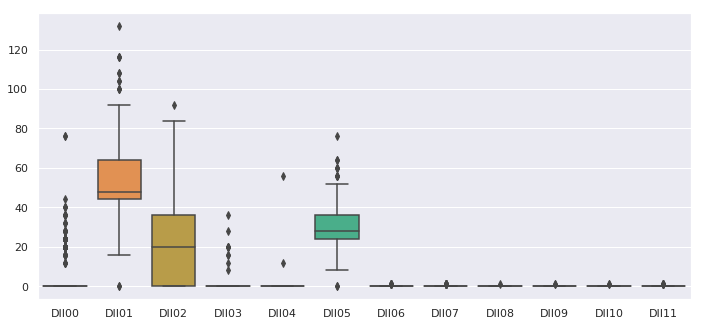

In [40]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

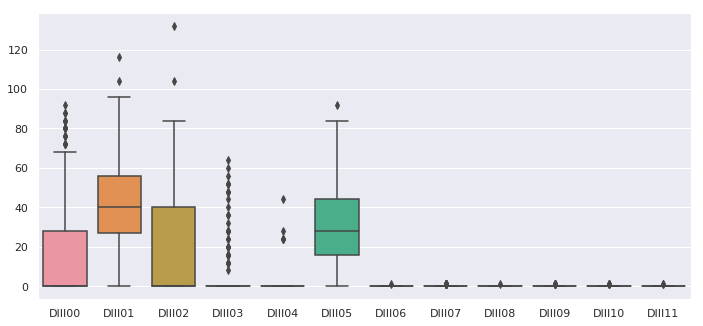

In [41]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

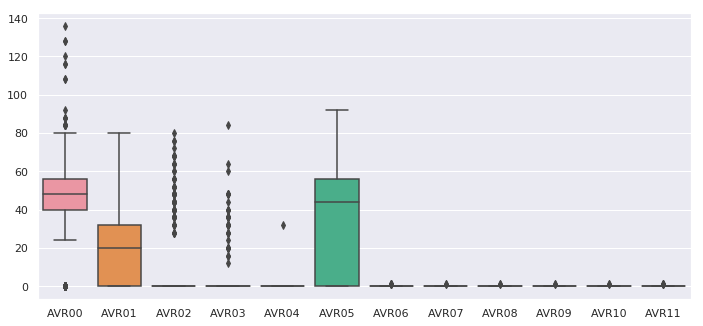

In [42]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                       "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

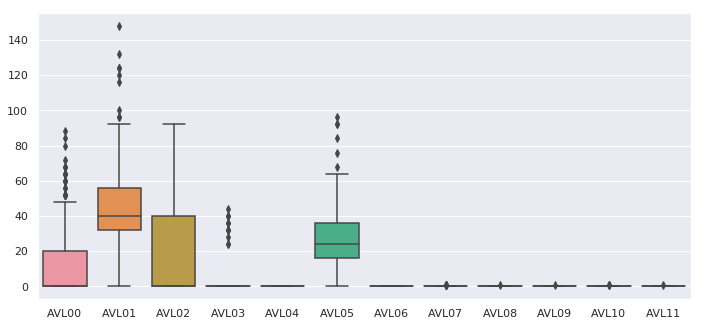

In [43]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

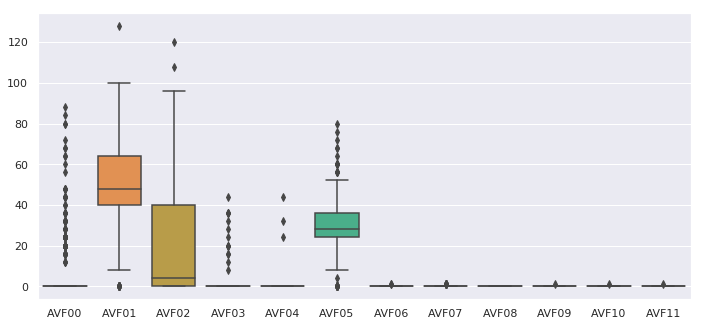

In [44]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

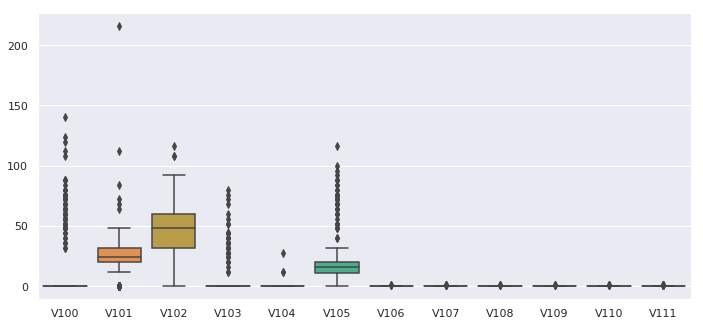

In [45]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111"]]);

In [46]:
X["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

**V101** has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. Since our data is heavily biased, I can't say these outliers should be dropped. 

For example, when we look at our data, we can see that class # 8 (Supraventricular Premature Contraction) **has only 2 instances**. Or # 3 (Ventricular Premature Contraction (PVC)) has only 3. The outliers appearing with our plots might belong to these instances and needs to be kept.

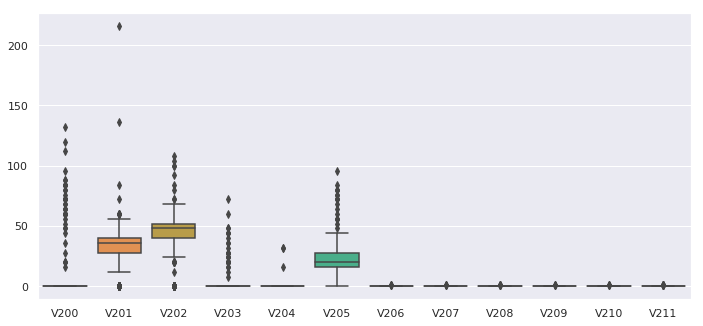

In [47]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211"]]);

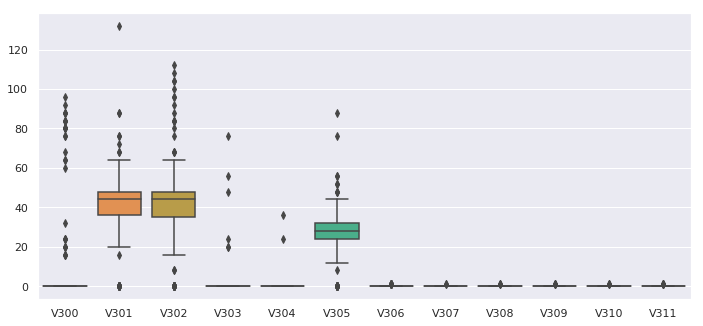

In [48]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311"]]);

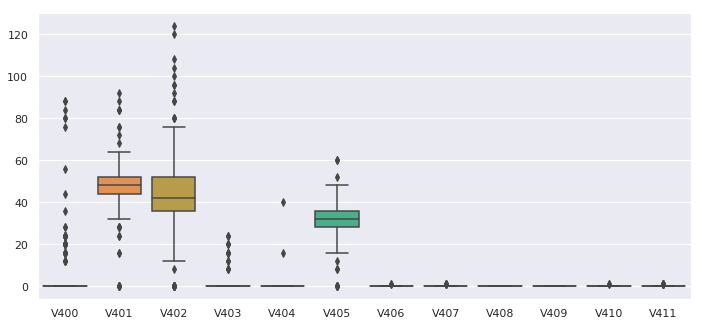

In [49]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411"]]);

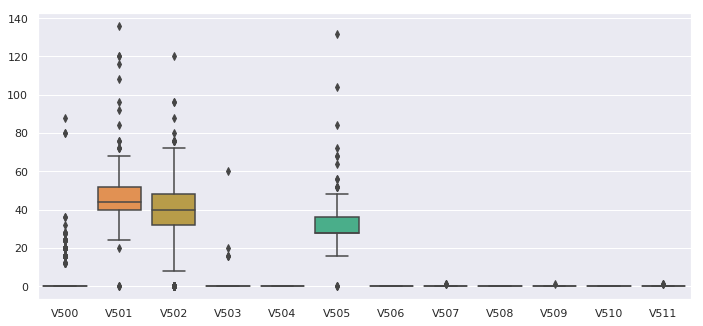

In [50]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511"]]);

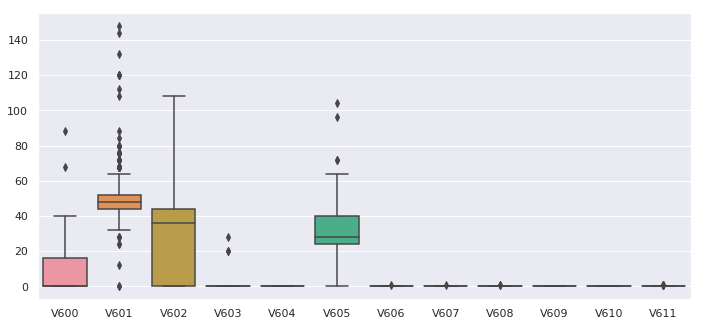

In [51]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611"]]);

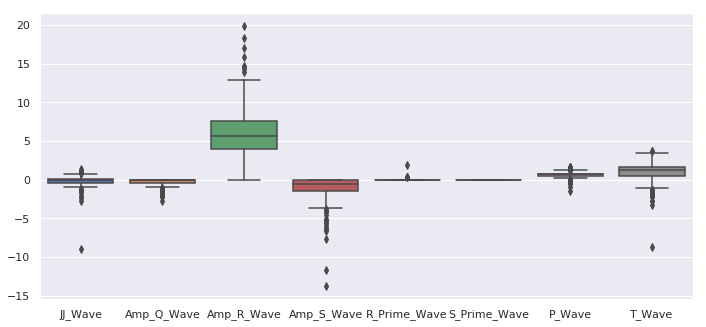

In [52]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

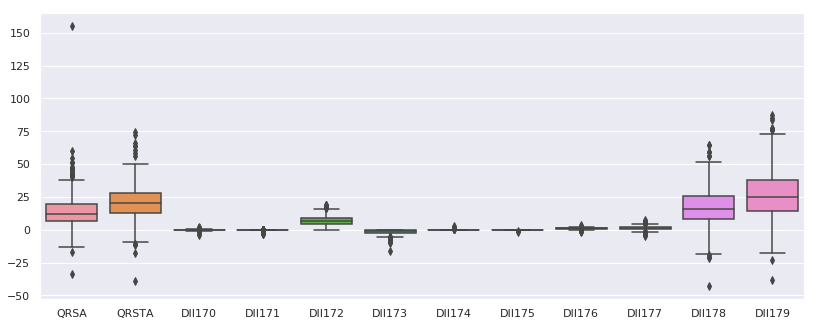

In [53]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=X[["QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179"]]);

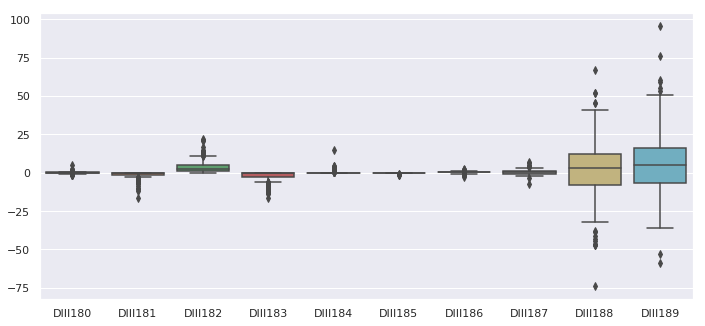

In [54]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189"]]);

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiarly assuming that these outliers might belong to the classes with few instances.

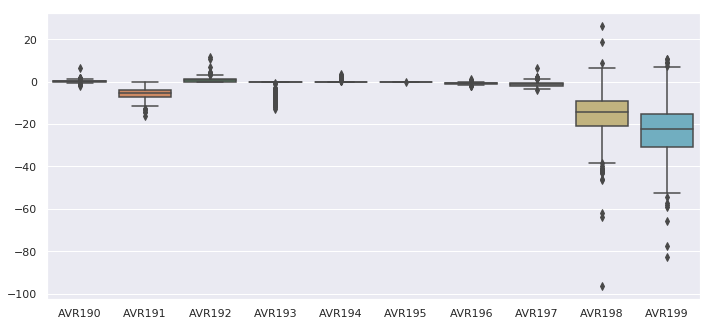

In [55]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

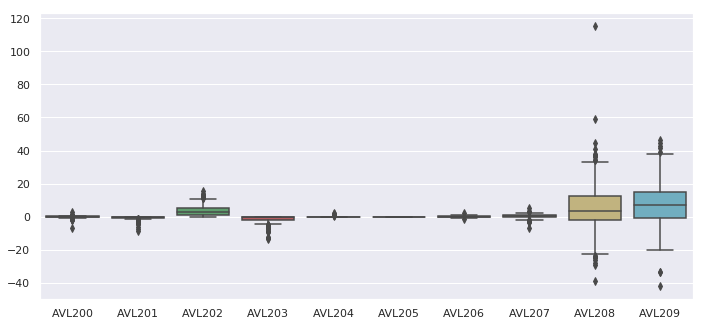

In [56]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

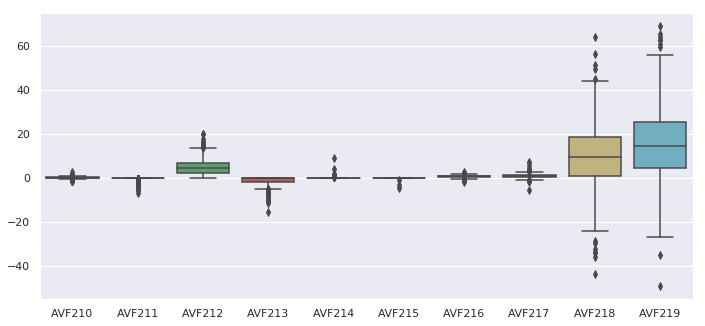

In [57]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

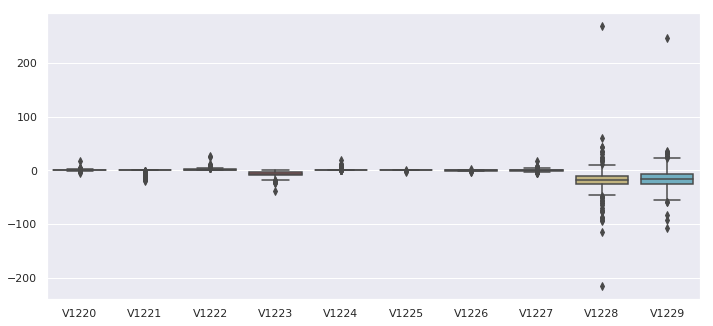

In [58]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229"]]);

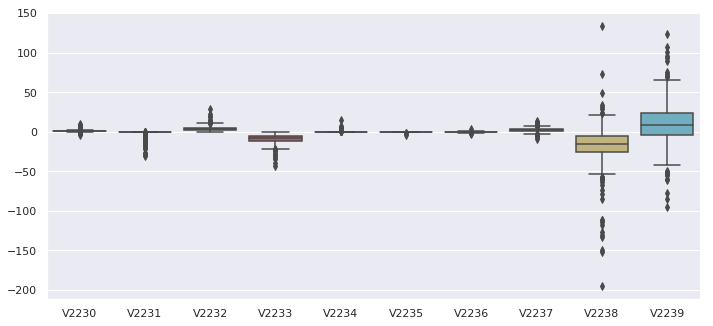

In [59]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239"]]);

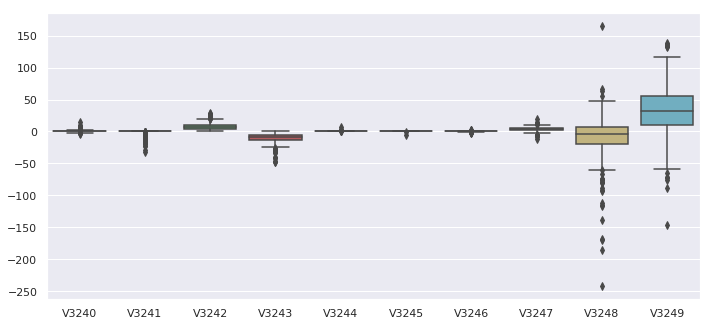

In [60]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249"]]);

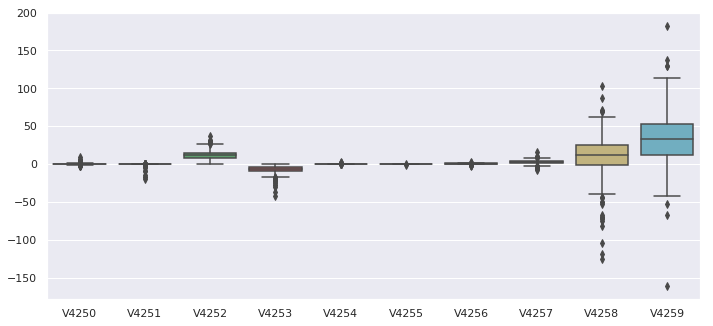

In [61]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259"]]);

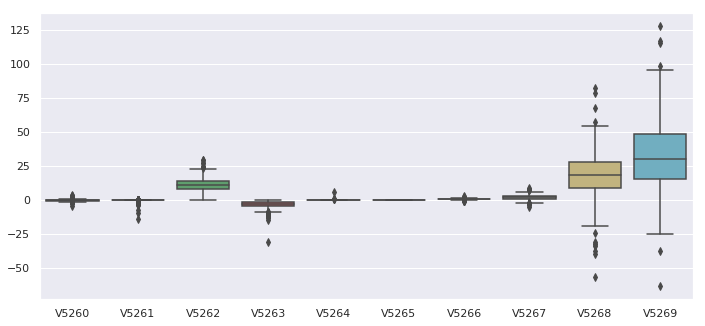

In [62]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269"]]);

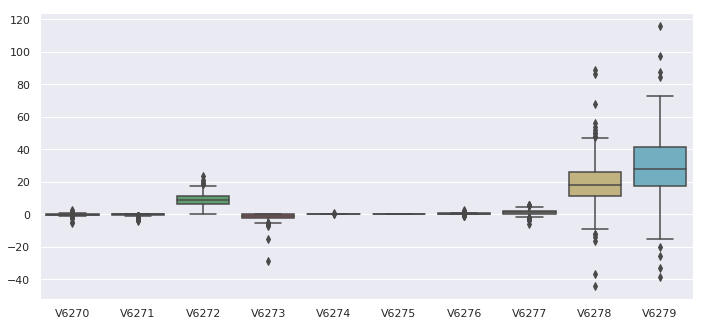

In [63]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]]);

### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 10)

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Choosing ML Models and metrics

My intention is to try all applicable ML models in order to practice my knowledge.

Thinking about the classification evaluation metrics, the importance of my models' precitions (I can't accept a result having the probability of saying to a healty person that you have Cardiac Arrhythmia (FN)). 

I definitely will focus on **Sensitivity** (the percentage of sick people who are correctly identified as having the condition) not Specificity (percentage of healthy people who are correctly identified as not having the condition). 

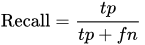

So, I'll use recall for my models and sklearn has a **"weighted"** metric which accounts for class imbalance by computing the average of metrics in which each class’s score is weighted by its presence in the true data sample.

I'll use GridSearchCV to obtain the best parameters for each model and get my results by applying those parameters.


### KNN Clasification

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1,2,3,4,5,7,10]}

grid_search = GridSearchCV (knn_clf, param_grid, cv=kFold,scoring = 'recall_weighted', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [67]:
grid_search.best_params_

{'n_neighbors': 3}

In [68]:
grid_search.best_score_

0.5963541666666666

In [69]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [70]:
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

knn_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
knn_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(knn_train_recall_score))
print('Test Recall score: {}'
      .format(knn_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6692708333333334
Test Recall score: 0.6470588235294118


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Model fit well but KNN results are not good. 

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [72]:
grid_search.best_params_

{'C': 1}

In [73]:
grid_search.best_score_

0.6979166666666666

In [74]:
lreg_clf= LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)
lreg_clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [75]:
y_pred_train = lreg_clf.predict(X_train)
y_pred_test = lreg_clf.predict(X_test)

lreg_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lreg_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lreg_train_recall_score))
print('Test Recall score: {}'
      .format(lreg_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8411458333333334
Test Recall score: 0.6764705882352942


array([[37,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

The large difference between train and test scores showing that the model is overfitting and low test score is also showing that Logistic Regression doesn't perform well.

### Linear SVM

In [76]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [77]:
grid_search.best_params_

{'C': 0.1}

In [78]:
grid_search.best_score_

0.7005208333333334

In [79]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [80]:
y_pred_train = LSVC_clf.predict(X_train)
y_pred_test = LSVC_clf.predict(X_test)

lsvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lsvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(lsvc_train_recall_score))
print('Test Recall score: {}'
      .format(lsvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7838541666666666
Test Recall score: 0.7205882352941176


array([[39,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Test score is better than KNN and Logistic Regression. Also model is good fit as there is not much difference between train and test score.

### Kernelized SVM

In [81]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [82]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [83]:
grid_search.best_score_

0.7057291666666666

In [84]:
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)

KSVC_clf.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [85]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

ksvc_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
ksvc_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(ksvc_train_recall_score))
print('Test Recall score: {}'
      .format(ksvc_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9765625
Test Recall score: 0.6764705882352942


array([[35,  1,  0,  0,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

We can see that test score is poor and Kernalised SVM doesn't perform well. Also model is overfitting as there is large difference between train and test score.

### Naive Bayes

In [86]:
from sklearn.naive_bayes import MultinomialNB

mnb_clf = MultinomialNB()
param_grid = {'alpha':[0,1.0,10], 'fit_prior':(True, False)}

grid_search = GridSearchCV(mnb_clf, param_grid,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0, 1.0, 10], 'fit_prior': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [87]:
grid_search.best_params_

{'alpha': 0, 'fit_prior': True}

In [88]:
grid_search.best_score_

0.6067708333333334

In [89]:
mnb_clf = MultinomialNB(alpha=0, fit_prior=True)

mnb_clf.fit(X_train, y_train)

MultinomialNB(alpha=0, class_prior=None, fit_prior=True)

In [90]:
y_pred_train = mnb_clf.predict(X_train)
y_pred_test = mnb_clf.predict(X_test)

mnb_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
mnb_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(mnb_train_recall_score))
print('Test Recall score: {}'
      .format(mnb_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7604166666666666
Test Recall score: 0.6323529411764706


array([[35,  0,  0,  0,  1,  1,  0,  2,  0,  0,  1],
       [ 3,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

### Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [92]:
grid_search.best_params_

{'max_depth': 6}

In [93]:
grid_search.best_score_

0.6770833333333334

In [94]:
dt_clf = DecisionTreeClassifier(max_depth=6)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

dt_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_train_recall_score))
print('Test Recall score: {}'
      .format(dt_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8463541666666666
Test Recall score: 0.7205882352941176


array([[37,  0,  1,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0]])

Test score is poor and decision tree doesn't perform well. Also model is somewhat overfitting as there is difference between train and test score.

## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [100,125,150,200],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [100, 125, 150, 200], 'max_depth': [6, 8, 10, 12, 14], 'max_leaf_nodes': [20, 22, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [97]:
grid_search.best_params_

{'max_depth': 10, 'max_features': 100, 'max_leaf_nodes': 30}

In [98]:
grid_search.best_score_

0.7578125

In [99]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=100, max_leaf_nodes=30,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
rf_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(rf_train_recall_score))
print('Test Recall score: {}'
      .format(rf_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.9375
Test Recall score: 0.7647058823529411


array([[37,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Test score is good and Random forest performs well as it is ensemble method. But model is overfitting as there is large difference between train and test score.

In [101]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

hard_voting_clf = VotingClassifier(estimators=[('knn', knn_clf),('lr',lreg_clf),('lsvc', LSVC_clf),
                                   ('ksvc', KSVC_clf),('dt', dt_clf), ('rt', rf_clf)],voting = 'hard')
hard_voting_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(hard_voting_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(hard_voting_clf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.69


/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [102]:
score = cross_val_score(estimator=hard_voting_clf,X=X_train,y=y_train, scoring='recall_weighted', cv=kFold)

/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/muzo/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

In [103]:
print('Mean Score: {0:0.2f}'.format(score.mean()))
print('Mean Std: {0:0.2f}'.format(score.std()))

Mean Score: 0.71
Mean Std: 0.02


In [104]:
X_scaled = scaler.fit_transform(X)

### Bagging with KNN¶

In [105]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
bag_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=100,bootstrap_features=True, bootstrap=False,
                            max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_knn, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)

In [106]:
print('Mean score:', score.mean())

Mean score: 0.5448364251823543


Bagging is giving us a very low score. It doesn't improve our model

### Pasting with KNN

In [107]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

#knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
bag_knn = BaggingClassifier(base_estimator=knn_clf, n_estimators=100,bootstrap_features=True, bootstrap=False,
                            max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_knn, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)

In [108]:
print('Mean score:', score.mean())


Mean score: 0.5448364251823543


Pasting is also giving us a very low score. It doesn't improve our model

### Bagging with Logistic Reg

In [109]:
from sklearn.ensemble import BaggingClassifier

bag_log = BaggingClassifier(base_estimator=lreg_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_log, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())


Mean score: 0.5516381256074606


### Bagging with Linear SVC

In [110]:
bag_lsvc = BaggingClassifier(base_estimator=LSVC_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_lsvc, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.6376323090526922


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with SVM

In [111]:
bag_ksvc = BaggingClassifier(base_estimator=KSVC_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_ksvc, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.5623779509514988


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with Decision Tree

In [112]:
bag_dt = BaggingClassifier(base_estimator=dt_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_dt, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.6291450748845996


The bagging algorithm has raised the bias and doesn't improve our model

### Bagging with Random Forest

In [113]:
bag_rf = BaggingClassifier(base_estimator=rf_clf, n_estimators=100,bootstrap_features=True, max_samples=50, max_features=100)

score = cross_val_score(estimator=bag_rf, X=X_scaled, y=y, scoring='recall_weighted', cv=kFold, n_jobs=-1)
print('Mean score:', score.mean())

Mean score: 0.5849368657758959


The bagging algorithm has raised the bias and doesn't improve our model

### Adaptive boosting with decision tree classifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = dt_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.72


Adaptive boosting did in fact raise the average training accuracy for the Decision Tree but the test accuracy got reduced

### AdBoosting with Random Forest

In [115]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(base_estimator = rf_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.99
Test score: 0.69


Adaptive boosting did in fact raise the average training accuracy for the Decision Tree but the test accuracy got reduced. It is still overfitting

### Adaptive Boosting with Logistic Regression

In [116]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = lreg_clf, learning_rate = 0.5)
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.57
Test score: 0.60


Adaptive boosting improved our test accuracy with logistic model and has an improved model fit

### Adaptive Boosting with LinearSVC

In [117]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = LSVC_clf, algorithm='SAMME')
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.78
Test score: 0.72


Adaptive boosting did in fact reduced the average test accuracy for the Decision Tree but the test accuracy got increased. Therefore, it has a poor fit with Linear SVC

### Adaptive Boosting with KNN

KNeighborsClassifier does not support sample weights, so we will not be able to use Adaptive Boosting to lower the model bias.

### Adaptive Boosting with Kernel SVC

In [118]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf = AdaBoostClassifier(base_estimator = KSVC_clf, algorithm='SAMME')
adaboost_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(adaboost_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_clf.score(X_test, y_test)))

Train score: 0.53
Test score: 0.59


Adaptive boosting has very low accuracy for Kernel SVC. So it's not a good fit

### Gradient Boosting

In [119]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(learning_rate = 0.05)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.71


Gradient Boosting is overfitting the model

In [120]:
GB = GradientBoostingClassifier()
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.71
Mean Accuracy: 0.7304787334010931


Gradient Boosting is overfitting the model

In [121]:
GB2 = GradientBoostingClassifier(min_samples_leaf=9, learning_rate=0.05, n_estimators=100)
score = cross_val_score(estimator=GB, X=X_scaled, y=y, cv=kFold, n_jobs=-1)
gb_clf.fit(X_train, y_train)
print('Train score: {0:0.2f}'.format(gb_clf.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_clf.score(X_test, y_test)))
print('Mean Accuracy:', score.mean())

Train score: 1.00
Test score: 0.72
Mean Accuracy: 0.7259370868152277



It is clear that, while the bagging and boosting techniques mentioned above are
usually effective, most did not do much to improve the models.
    Due to reasons like imbalanced classes, high dimensionality and lack of observations, we couldn't get an optimal model.



In [122]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, svd_solver='auto')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_comb_pca = np.concatenate((X_train_pca, X_test_pca), axis=0)

In [123]:
X_train_pca.shape

(384, 100)

### KNN Classification with PCA


In [124]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)

param_grid={'n_neighbors':[1,2,3,4,5,7,10]}

grid_search = GridSearchCV(knn_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [125]:
grid_search.cv_results_

{'mean_fit_time': array([0.00308466, 0.00236869, 0.00212483, 0.00316567, 0.00267415,
        0.00218716, 0.00213494]),
 'mean_score_time': array([0.10493855, 0.10538487, 0.10483413, 0.1056859 , 0.10569105,
        0.10504818, 0.10516739]),
 'mean_test_score': array([0.5546875 , 0.59114583, 0.59895833, 0.58854167, 0.5859375 ,
        0.56770833, 0.57291667]),
 'mean_train_score': array([1.        , 0.69659241, 0.67252099, 0.63668232, 0.625623  ,
        0.60357192, 0.5761998 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 7, 10],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 10}],
 'rank_test_score': array([7, 2, 1, 3, 4, 6, 5], dtype=int32),
 'split0_test_score': array([0.57317073, 0.58536585, 0.59756098, 0.57317073, 0.57317073,
        0.548

In [126]:
grid_search.best_params_

{'n_neighbors': 3}

In [127]:
grid_search.best_score_

0.5989583333333334

In [128]:
knn_clf=KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [129]:
y_pred_train = knn_clf.predict(X_train_pca)
y_pred_test = knn_clf.predict(X_test_pca)

knn_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
knn_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(knn_pca_train_recall_score))
print('Test Recall score: {}'
      .format(knn_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6770833333333334
Test Recall score: 0.6470588235294118


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

KNN shows an improved model accuracy and fit after applying PCA

### Logistic Regression with PCA

In [130]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(lreg_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [131]:
grid_search.cv_results_

{'mean_fit_time': array([0.07066083, 0.07231317, 0.04898829, 0.02286568, 0.01763182,
        0.02276917, 0.05267158, 0.06947045]),
 'mean_score_time': array([0.00062094, 0.0006351 , 0.00060477, 0.00064573, 0.00061183,
        0.00061283, 0.00062594, 0.0007266 ]),
 'mean_test_score': array([0.53385417, 0.53385417, 0.53385417, 0.53385417, 0.609375  ,
        0.703125  , 0.6875    , 0.65364583]),
 'mean_train_score': array([0.53393884, 0.53393884, 0.53393884, 0.53393884, 0.64196531,
        0.82942694, 0.95573529, 0.99870108]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([5, 5, 5, 5, 4, 1, 2, 3], dtype=int32),
 'split0_test_score': array([0.5       , 0.5       , 0.5       , 0.5 

In [132]:
grid_search.best_params_

{'C': 1}

In [133]:
grid_search.best_score_

0.703125

In [134]:
lreg_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',C=1)
lreg_clf.fit(X_train_pca, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [135]:
y_pred_train = lreg_clf.predict(X_train_pca)
y_pred_test = lreg_clf.predict(X_test_pca)

logreg_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
logreg_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(logreg_pca_train_recall_score))
print('Test Recall score: {}'
      .format(logreg_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8255208333333334
Test Recall score: 0.6764705882352942


array([[37,  1,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Logistics Regression shows an improved model accuracy and fit after applying PCA.

### Linear SVM with PCA

In [136]:
from sklearn.svm import LinearSVC

LSVC_clf = LinearSVC(multi_class='crammer_singer')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100]}

grid_search = GridSearchCV(LSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [137]:
grid_search.cv_results_

{'mean_fit_time': array([0.00384817, 0.00540633, 0.01134663, 0.01593122, 0.02146134,
        0.06462941, 0.19958692, 0.25545306]),
 'mean_score_time': array([0.00075207, 0.00059576, 0.00068483, 0.00067716, 0.00064921,
        0.00078516, 0.00079546, 0.00076509]),
 'mean_test_score': array([0.61458333, 0.61458333, 0.61458333, 0.6171875 , 0.70052083,
        0.70052083, 0.609375  , 0.58854167]),
 'mean_train_score': array([0.64708695, 0.64578367, 0.64578367, 0.65291468, 0.776758  ,
        0.91268746, 0.98694107, 1.        ]),
 'param_C': masked_array(data=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.0001},
  {'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100}],
 'rank_test_score': array([4, 4, 4, 3, 1, 1, 7, 8], dtype=int32),
 'split0_test_score': array([0.62195122, 0.62195122, 0.62195122, 0.62

In [138]:
grid_search.best_params_

{'C': 0.1}

In [139]:
grid_search.best_score_

0.7005208333333334

In [140]:
LSVC_clf = LinearSVC(multi_class='crammer_singer', C=0.1)
LSVC_clf.fit(X_train_pca, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='crammer_singer', penalty='l2', random_state=None,
     tol=0.0001, verbose=0)

In [141]:
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

lscvc_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
lscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(lscvc_pca_train_recall_score))
print('Test Recall score: {}'
      .format(lscv_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7760416666666666
Test Recall score: 0.7352941176470589


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Linear SVM still overfits the model after applying PCA.

### Kernalised SVM with PCA

In [142]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf')

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.01,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [143]:
grid_search.cv_results_

{'mean_fit_time': array([0.01414165, 0.01295366, 0.01228118, 0.01236997, 0.01281295,
        0.01266971, 0.01230402, 0.01225595, 0.01228704, 0.0125978 ,
        0.01292105, 0.01527786, 0.01217208, 0.01209855, 0.01301517,
        0.01772442, 0.03512678, 0.04573731, 0.01218777, 0.01326957,
        0.01680398, 0.02097392, 0.04523244, 0.06149678, 0.01322584,
        0.01706586, 0.01866612, 0.02125564, 0.05264406, 0.06671934,
        0.01638527, 0.01755128, 0.01763983, 0.0223217 , 0.05633111,
        0.06861205]),
 'mean_score_time': array([0.00329871, 0.00356684, 0.00285521, 0.00274425, 0.00295897,
        0.00276265, 0.00298824, 0.00278268, 0.00276113, 0.00278573,
        0.00296555, 0.00315032, 0.00277066, 0.00278492, 0.00292029,
        0.00301371, 0.00357456, 0.00362425, 0.00293903, 0.00288787,
        0.00310726, 0.0042541 , 0.00363517, 0.00366492, 0.00281429,
        0.00395212, 0.00341358, 0.00322762, 0.00369411, 0.00366917,
        0.00304942, 0.00311198, 0.00310626, 0.0033308 , 0.

In [144]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1}

In [145]:
grid_search.best_score_

0.7057291666666666

In [146]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.1)
KSVC_clf.fit(X_train_pca, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [147]:
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

kscv_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
kscv_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')
print('Train Recall score: {}'
      .format(kscv_pca_train_recall_score))
print('Test Recall score: {}'
      .format(kscv_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.96875
Test Recall score: 0.6764705882352942


array([[35,  1,  0,  0,  0,  3,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

Kernalized SVM still overfits the model after applying PCA.

### Decision Trees with PCA

In [148]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [2, 3, 4, 5,6, 10, 20]}

grid_search = GridSearchCV(dt_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [149]:
grid_search.cv_results_

{'mean_fit_time': array([0.0068614 , 0.00923858, 0.01223283, 0.0158246 , 0.01628027,
        0.02211089, 0.02723622]),
 'mean_score_time': array([0.00060582, 0.0006072 , 0.00062366, 0.00137534, 0.00062566,
        0.00059562, 0.00066948]),
 'mean_test_score': array([0.546875  , 0.56770833, 0.54947917, 0.52864583, 0.53125   ,
        0.46875   , 0.44010417]),
 'mean_train_score': array([0.58403044, 0.63489796, 0.69736229, 0.75210961, 0.81007198,
        0.95511379, 0.99934853]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 10, 20],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 10},
  {'max_depth': 20}],
 'rank_test_score': array([3, 1, 2, 5, 4, 6, 7], dtype=int32),
 'split0_test_score': array([0.52439024, 0.51219512, 0.52439024, 0.5       , 0.51219512,
        0.37804878, 0.34146

In [150]:
grid_search.best_params_

{'max_depth': 3}

In [151]:
grid_search.best_score_

0.5677083333333334

In [152]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [153]:
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

dt_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
dt_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(dt_pca_train_recall_score))
print('Test Recall score: {}'
      .format(dt_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6744791666666666
Test Recall score: 0.5735294117647058


array([[37,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

We can see that decision tree performs really bad with PCA. This may be due to information lose due to dimentionality reduction.
Also model is also overfitting as there is difference between train and test score.



### Random Forest with PCA

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',n_jobs= -1,random_state=10)

param_grid = {'max_features': [25,50,75,100],
          'max_depth': [6,8,10,12,14],
           'max_leaf_nodes':[20,22,30,50]}

grid_search = GridSearchCV(rf_clf, param_grid, scoring = 'recall_weighted',cv=kFold, return_train_score=True)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [25, 50, 75, 100], 'max_depth': [6, 8, 10, 12, 14], 'max_leaf_nodes': [20, 22, 30, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall_weighted', verbose=0)

In [155]:
grid_search.cv_results_

{'mean_fit_time': array([0.6353097 , 0.62166672, 0.63830252, 0.65352483, 1.05662494,
        1.05628414, 1.0570055 , 1.07727771, 1.44160452, 1.43944349,
        1.45781431, 1.47898993, 1.83540931, 1.80207653, 1.89006934,
        1.88804822, 0.6855433 , 0.70486917, 0.7159524 , 0.77657566,
        1.5430656 , 1.13809981, 1.17758884, 1.19919496, 1.54314647,
        1.55906663, 1.63902822, 1.68119435, 1.96041846, 2.00637765,
        2.10276361, 2.22479119, 0.90579419, 0.92390423, 0.9343174 ,
        1.07585068, 1.80484085, 2.56040602, 3.09507666, 3.09029384,
        3.32652159, 3.06917725, 3.33959002, 3.30086489, 6.61946106,
        4.32442141, 6.41778646, 6.70542998, 2.41925349, 2.59247108,
        3.24539542, 3.57006841, 4.24062943, 4.31252332, 4.56666512,
        4.73037047, 5.46374969, 5.33921647, 5.94779272, 6.23084822,
        6.53958263, 6.75023851, 7.04946141, 7.56045432, 2.77606144,
        2.84284172, 2.92104235, 3.43188548, 4.19826727, 4.07071557,
        4.15883479, 4.9189723 ,

In [156]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 25, 'max_leaf_nodes': 50}

In [157]:
grid_search.best_score_

0.6302083333333334

In [158]:
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=50,max_depth=12,max_leaf_nodes=50)
rf_clf.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=50, max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [159]:
y_pred_train = rf_clf.predict(X_train_pca)
y_pred_test = rf_clf.predict(X_test_pca)

rf_pca_train_recall_score = recall_score(y_train, y_pred_train, average='weighted')
rf_pca_test_recall_score = recall_score(y_test, y_pred_test, average='weighted')

print('Train Recall score: {}'
      .format(rf_pca_train_recall_score))
print('Test Recall score: {}'
      .format(rf_pca_test_recall_score))

metrics.confusion_matrix(y_test, y_pred_test)


Train Recall score: 0.9557291666666666
Test Recall score: 0.6323529411764706


array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [160]:
y_test.value_counts()

1     40
10     5
16     4
4      4
3      4
2      4
6      3
15     1
14     1
9      1
5      1
Name: 279, dtype: int64


Random forest is also overfitting the model after applying PCA.

In [161]:
train_recall_scores= [knn_train_recall_score, lreg_train_recall_score, lsvc_train_recall_score, ksvc_train_recall_score, 
                      mnb_train_recall_score, dt_train_recall_score, rf_train_recall_score, knn_pca_train_recall_score,
                      logreg_pca_train_recall_score, lscvc_pca_train_recall_score, kscv_pca_train_recall_score, 
                      dt_pca_train_recall_score, rf_pca_train_recall_score]

test_recall_scores= [knn_test_recall_score, lreg_test_recall_score, lsvc_test_recall_score, ksvc_test_recall_score,
                     mnb_test_recall_score, dt_test_recall_score, rf_test_recall_score, knn_pca_test_recall_score,
                     logreg_pca_test_recall_score, lscv_pca_test_recall_score, kscv_pca_test_recall_score, 
                     dt_pca_test_recall_score, rf_pca_test_recall_score]

classifiers = ['KNN Clasification', 'Logistic Regression', 'Linear SVM', 'Kernelized SVM', 'Naive Bayes', 'Decision Tree',
               'Random Forest', 'KNN Classification with PCA', 'Logistic Regression with PCA', 'Linear SVM with PCA',
               'Kernalised SVM with PCA', 'Decision Trees with PCA', 'Random Forest with PCA']

In [162]:
for_plot = pd.DataFrame ([train_recall_scores, test_recall_scores], columns=classifiers, index=['Train Recall Score', 'Test Recall Score'])
for_plot=for_plot.T

In [163]:
for_plot

,Train Recall Score,Test Recall Score
KNN Clasification,0.669271,0.647059
Logistic Regression,0.841146,0.676471
Linear SVM,0.783854,0.720588
Kernelized SVM,0.976562,0.676471
Naive Bayes,0.760417,0.632353
Decision Tree,0.846354,0.720588
Random Forest,0.937500,0.764706
KNN Classification with PCA,0.677083,0.647059
Logistic Regression with PCA,0.825521,0.676471
Linear SVM with PCA,0.776042,0.735294


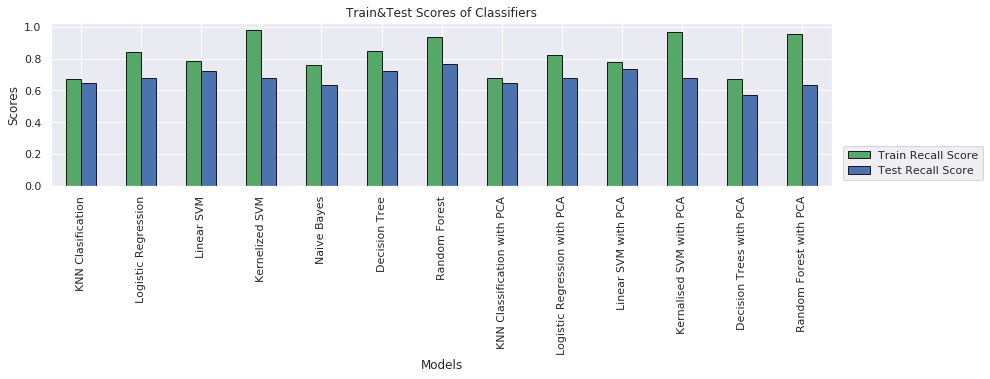

In [164]:
for_plot.plot(kind='bar', figsize=(14,3), color='gbmykc',  edgecolor='k')

plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

The Results have improved after using PCA. We get the best result using Linear SVC after applying PCA